<span style="color: purple">

Load in stored variables:

</span>

In [1]:
%store -r data_dir sites_gdf siskiyou_forest_gdf padres_forest_gdf siskiyou_soil_ph_da padres_soil_ph_da siskiyou_srtm_da padres_srtm_da ave_annual_pr_das_list climate_df_list

<span style="color: purple">

Import packages:

</span>

In [ ]:
# Import necessary packages
import matplotlib.pyplot as plt # Overlay pandas and xarray plots
import rioxarray as rxr # Work with raster data
import xarray as xr # Work with DataArrays

## STEP 3: HARMONIZE DATA

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure that the grids for all your data match each other. Check
out the <a
href="https://corteva.github.io/rioxarray/stable/examples/reproject_match.html#Reproject-Match"><code>ds.rio.reproject_match()</code>
method</a> from <code>rioxarray</code>. Make sure to use the data source
that has the highest resolution as a template!</p></div></div>

> **Warning**
>
> If you are reprojecting data as you need to here, the order of
> operations is important! Recall that reprojecting will typically tilt
> your data, leaving narrow sections of the data at the edge blank.
> However, to reproject efficiently it is best for the raster to be as
> small as possible before performing the operation. We recommend the
> following process:
>
>     1. Crop the data, leaving a buffer around the final boundary
>     2. Reproject to match the template grid (this will also crop any leftovers off the image)

<span style="color: purple">

All DataArrays will be reprojected to the soil pH DataArrays since they have a 30 meter resolution. The SRTM DataArrays also have a 30 m resolution, however I will reproject them as well for consistency.

Resolutions:

* soil data - 30 m resolution

* SRTM data - 30 m resolution

* Climate data - either [4 or 6 km](https://climate.northwestknowledge.net/MACA/gallery_info.php)

### Reproject SRTM DataArrays to the soil pH DataArrays
</span>

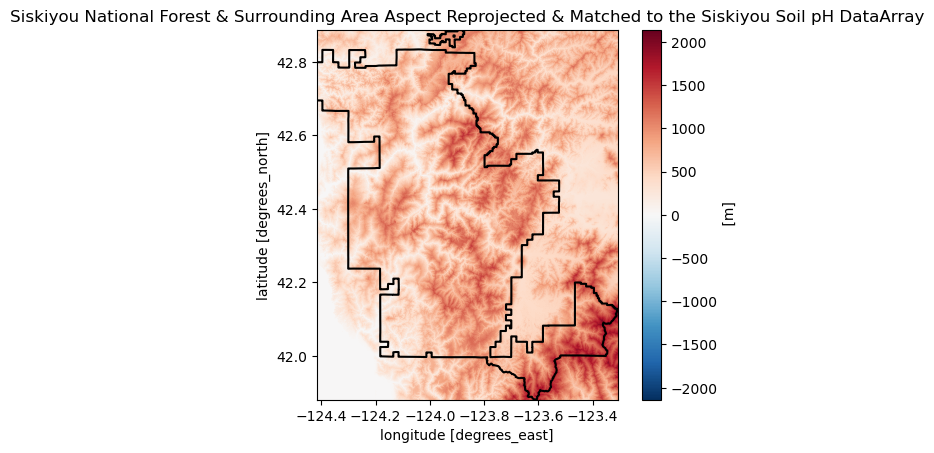

In [ ]:
# Reproject and match siskiyou_srtm_da to the siskiyou_soil_ph_da
siskiyou_elev_matched_da = (siskiyou_srtm_da
                              .rio.reproject_match(siskiyou_soil_ph_da))
siskiyou_elev_matched_da.plot()

# Plot Siskiyou National Forest boundary on siskiyou_elev_matched_da plot
siskiyou_forest_gdf.boundary.plot(ax = plt.gca(), color='black')

plt.title('Siskiyou National Forest & Surrounding Area Elevation Reprojected & '
          'Matched to the Siskiyou Soil pH DataArray')
plt.show()

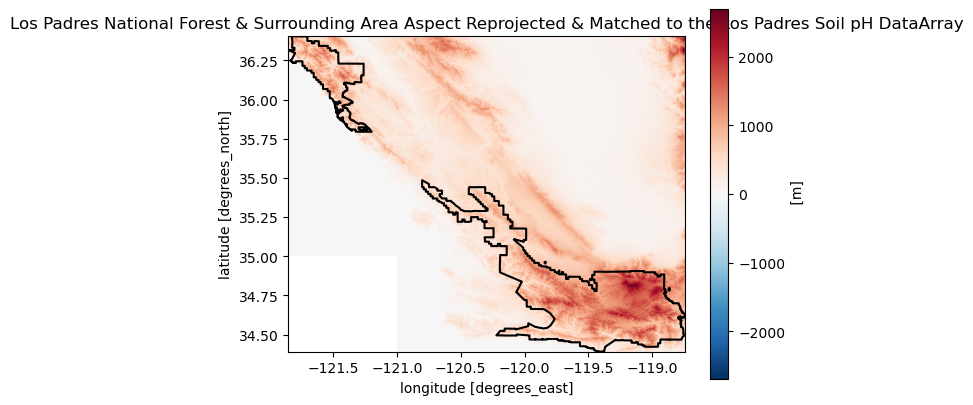

In [4]:
# Reproject and match padres_srtm_da to the padres_soil_ph_da
padres_elev_matched_da = (padres_srtm_da
                              .rio.reproject_match(padres_soil_ph_da))
padres_elev_matched_da.plot()

# Plot Los Padres National Forest boundary on padres_elev_matched_da plot
padres_forest_gdf.boundary.plot(ax = plt.gca(), color='black')

plt.title('Los Padres National Forest & Surrounding Area Elevation Reprojected & '
          'Matched to the Los Padres Soil pH DataArray')
plt.show()